In [108]:
# Import pandas
import pandas as pd

# import roc_curve
from sklearn.metrics import roc_curve


In [109]:
# Ler DB

df_certo = pd.read_csv("../app/database/breast-cancer-certo.csv")

df_certo.head(n=5)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [110]:
# Copiar
df_copy = df_certo

In [111]:
# Transformar dados categóricos em valores
map = {"M" : 0, "B" : 1}

df_copy["diagnosis"] = df_copy["diagnosis"].map(map)

df_copy.head(n=5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [112]:
# Dropar id
df_copy = df_copy.drop(["id"], axis=1)

df_copy.head(n=5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [113]:
# Definir o tager e a data

y = df_copy["diagnosis"] #target
x = df_copy.drop(["diagnosis"], axis=1) #data

In [114]:
# Normalizar os dados
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

x

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


In [115]:
# Separando os dataframes em teste e treino
from sklearn.model_selection import train_test_split

random_state = 42

x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size=0.3, random_state=random_state)

print(len(x_treino))
print(len(x_teste))

398
171


In [116]:
# Import verificação dos dados
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, cohen_kappa_score

In [117]:
# Graficos
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [118]:
# Configurar as variveis
estimator = 30
learning = 0.03

# Adaboost

In [119]:
from sklearn.ensemble import AdaBoostClassifier

In [120]:
ada_boost = AdaBoostClassifier(n_estimators=estimator, learning_rate=learning, random_state=random_state)

model = ada_boost.fit(x_treino, y_treino)

ada_predict = model.predict(x_teste)

ada_predict_prob = ada_boost.predict_proba(x_teste)

## Gráficos

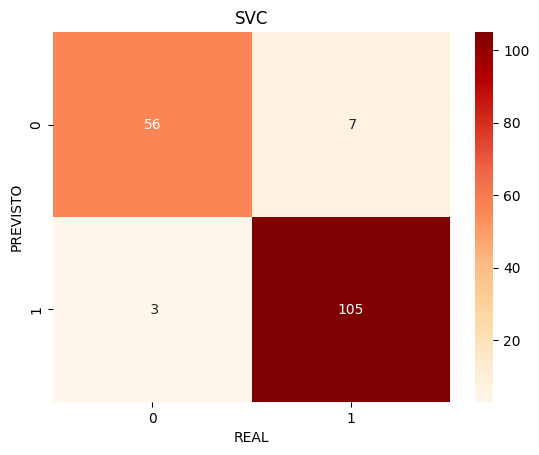

In [121]:
sns.heatmap(confusion_matrix(y_teste, ada_predict), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('SVC')
plt.ylabel('PREVISTO')
plt.xlabel('REAL')
plt.show()

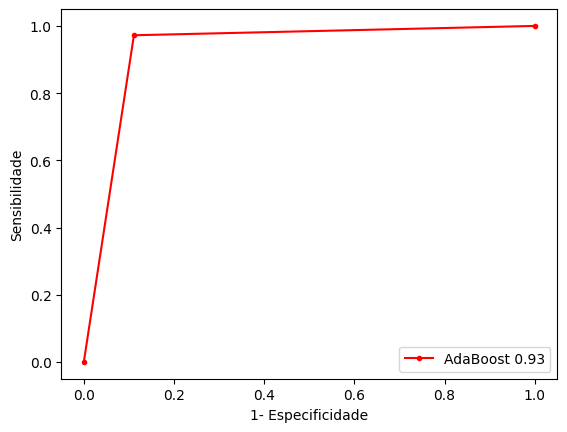

In [122]:
ada_fp, ada_vp, lim1 = roc_curve(y_teste, ada_predict)
ada_curva_roc = roc_auc_score(y_teste,ada_predict)

plt.plot(ada_fp, ada_vp, marker=".", label="AdaBoost "+str(round(ada_curva_roc, 2)), color="red")

plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')

plt.legend()

plt.show()

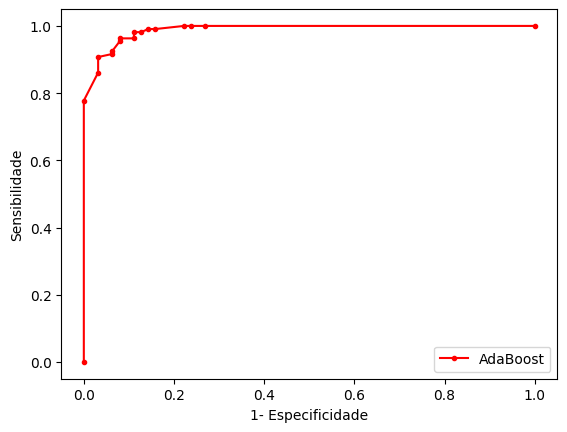

In [123]:
ada_probs = ada_predict_prob[:,1]

ada_fp, ada_vp, lim1 = roc_curve(y_teste, ada_probs)

plt.plot(ada_fp, ada_vp, marker=".", label="AdaBoost", color="red")

plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')

plt.legend()

plt.show()

## Resultado

In [124]:
acuracia = accuracy_score(y_teste,ada_predict)
precisao = precision_score(y_teste,ada_predict)
recall = recall_score(y_teste,ada_predict)
f1Score = f1_score(y_teste,ada_predict)
kappa = cohen_kappa_score(y_teste,ada_predict)

print('------ Adaboost ---------\n')
print(f'Acurácia: {acuracia}')
print(f'Precisão: {precisao}')
print(f'Recall ou Sensibilidade: {recall}')
print(f'F1-Score: {f1Score}')
print(f'Kappa: {kappa}')
print(f'Curva ROC: {ada_curva_roc}')

------ Adaboost ---------

Acurácia: 0.9415204678362573
Precisão: 0.9375
Recall ou Sensibilidade: 0.9722222222222222
F1-Score: 0.9545454545454546
Kappa: 0.8726541554959786
Curva ROC: 0.9305555555555556


# GBM

In [125]:
from sklearn.ensemble import GradientBoostingClassifier

In [126]:
gbm = GradientBoostingClassifier(n_estimators=estimator, learning_rate=learning, random_state=random_state)

model = gbm.fit(x_treino, y_treino)

gbm_predict = model.predict(x_teste)

gbm_predict_prob = gbm.predict_proba(x_teste)

## Gráficos

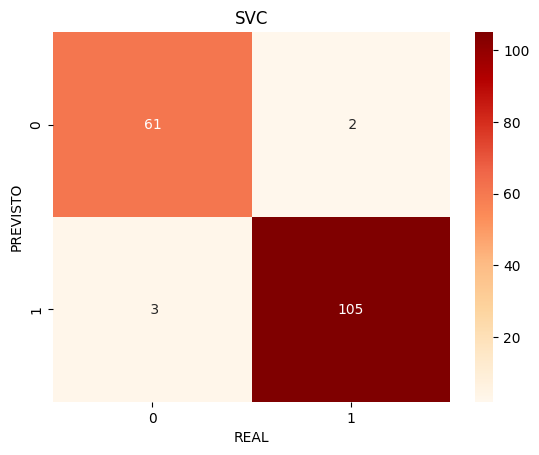

In [127]:
sns.heatmap(confusion_matrix(y_teste, gbm_predict), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('SVC')
plt.ylabel('PREVISTO')
plt.xlabel('REAL')
plt.show()

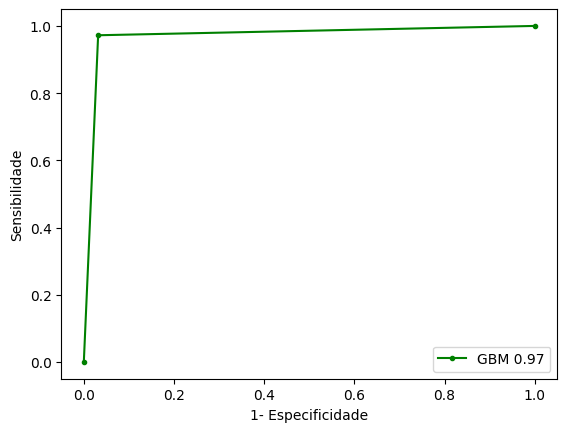

In [128]:
gbm_fp, gbm_vp, lim2 = roc_curve(y_teste, gbm_predict)
gbm_curva_roc = roc_auc_score(y_teste,gbm_predict)

plt.plot(gbm_fp, gbm_vp, marker=".", label="GBM "+str(round(gbm_curva_roc, 2)), color="green")

plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')

plt.legend()

plt.show()

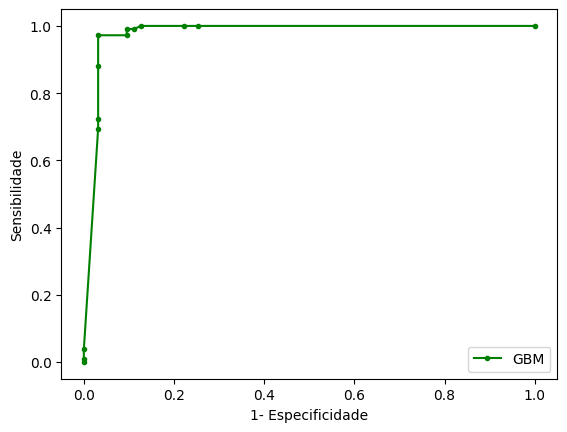

In [129]:
gbm_probs = gbm_predict_prob[:,1]

gbm_fp, gbm_vp, lim2 = roc_curve(y_teste, gbm_probs)

plt.plot(gbm_fp, gbm_vp, marker=".", label="GBM", color="green")

plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')

plt.legend()

plt.show()

## Resultado

In [130]:
acuracia = accuracy_score(y_teste,gbm_predict)
precisao = precision_score(y_teste,gbm_predict)
recall = recall_score(y_teste,gbm_predict)
f1Score = f1_score(y_teste,gbm_predict)
kappa = cohen_kappa_score(y_teste,gbm_predict)

print('------ GDM ---------\n')
print(f'Acurácia: {acuracia}')
print(f'Precisão: {precisao}')
print(f'Recall ou Sensibilidade: {recall}')
print(f'F1-Score: {f1Score}')
print(f'Kappa: {kappa}')
print(f'Curva ROC: {gbm_curva_roc}')

------ GDM ---------

Acurácia: 0.9707602339181286
Precisão: 0.9813084112149533
Recall ou Sensibilidade: 0.9722222222222222
F1-Score: 0.9767441860465117
Kappa: 0.9373764007910349
Curva ROC: 0.9702380952380952


# Random Forest

In [131]:
from sklearn.ensemble import RandomForestClassifier

In [132]:
rf = RandomForestClassifier(n_estimators=estimator, random_state=random_state)

model = rf.fit(x_treino, y_treino)

rf_predict = model.predict(x_teste)

rf_predict_prob = rf.predict_proba(x_teste)

## Gráficos

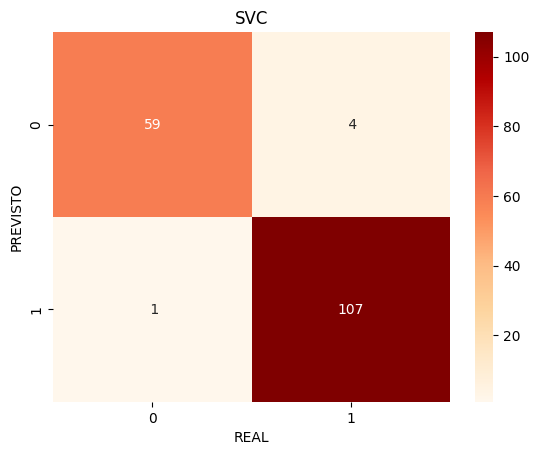

In [133]:
sns.heatmap(confusion_matrix(y_teste, rf_predict), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('SVC')
plt.ylabel('PREVISTO')
plt.xlabel('REAL')
plt.show()

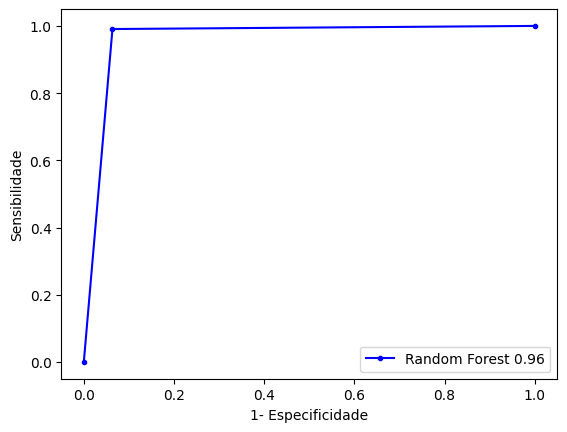

In [134]:
rf_fp, rf_vp, lim3 = roc_curve(y_teste, rf_predict)
rf_curva_roc = roc_auc_score(y_teste,rf_predict)

plt.plot(rf_fp, rf_vp, marker=".", label="Random Forest "+str(round(rf_curva_roc, 2)), color="blue")

plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')

plt.legend()

plt.show()

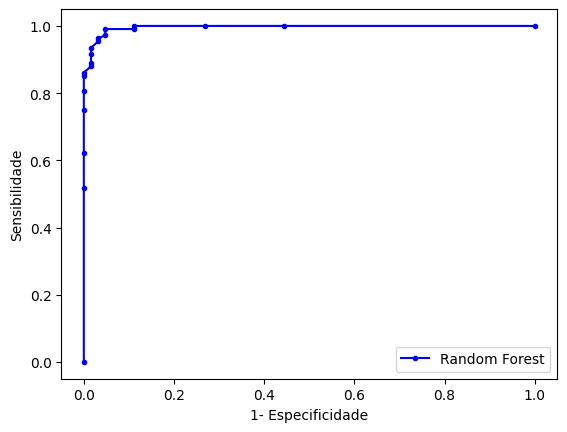

In [135]:
rf_probs = rf_predict_prob[:,1]

rf_fp, rf_vp, lim3 = roc_curve(y_teste, rf_probs)

plt.plot(rf_fp, rf_vp, marker=".", label="Random Forest", color="blue")

plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')

plt.legend()

plt.show()

## Resultado

In [136]:
acuracia = accuracy_score(y_teste,rf_predict)
precisao = precision_score(y_teste,rf_predict)
recall = recall_score(y_teste,rf_predict)
f1Score = f1_score(y_teste,rf_predict)
kappa = cohen_kappa_score(y_teste,rf_predict)

print('------ Random Forest ---------\n')
print(f'Acurácia: {acuracia}')
print(f'Precisão: {precisao}')
print(f'Recall ou Sensibilidade: {recall}')
print(f'F1-Score: {f1Score}')
print(f'Kappa: {kappa}')
print(f'Curva ROC: {rf_curva_roc}')

------ Random Forest ---------

Acurácia: 0.9707602339181286
Precisão: 0.963963963963964
Recall ou Sensibilidade: 0.9907407407407407
F1-Score: 0.9771689497716894
Kappa: 0.9365397461589846
Curva ROC: 0.9636243386243386


# CatBoost

In [137]:
from catboost import CatBoostClassifier

In [138]:
cat = CatBoostClassifier(n_estimators=estimator, learning_rate=learning, random_state=random_state)

model = cat.fit(x_treino, y_treino)

cat_predict = model.predict(x_teste)

cat_predict_prob = cat.predict_proba(x_teste)

0:	learn: 0.6458382	total: 53.8ms	remaining: 1.56s
1:	learn: 0.6040505	total: 85.3ms	remaining: 1.19s
2:	learn: 0.5595114	total: 159ms	remaining: 1.43s
3:	learn: 0.5247972	total: 202ms	remaining: 1.31s
4:	learn: 0.4989183	total: 273ms	remaining: 1.36s
5:	learn: 0.4676436	total: 297ms	remaining: 1.19s
6:	learn: 0.4365765	total: 352ms	remaining: 1.16s
7:	learn: 0.4082513	total: 394ms	remaining: 1.08s
8:	learn: 0.3813392	total: 441ms	remaining: 1.03s
9:	learn: 0.3589422	total: 506ms	remaining: 1.01s
10:	learn: 0.3397529	total: 564ms	remaining: 974ms
11:	learn: 0.3242976	total: 596ms	remaining: 894ms
12:	learn: 0.3073592	total: 619ms	remaining: 809ms
13:	learn: 0.2923166	total: 670ms	remaining: 765ms
14:	learn: 0.2767856	total: 705ms	remaining: 705ms
15:	learn: 0.2629157	total: 755ms	remaining: 660ms
16:	learn: 0.2514883	total: 816ms	remaining: 624ms
17:	learn: 0.2395820	total: 871ms	remaining: 580ms
18:	learn: 0.2293391	total: 906ms	remaining: 525ms
19:	learn: 0.2181358	total: 947ms	remai

## Gráficos

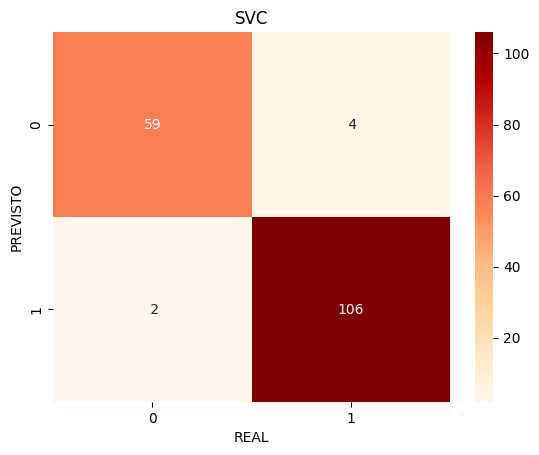

In [139]:
sns.heatmap(confusion_matrix(y_teste, cat_predict), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('SVC')
plt.ylabel('PREVISTO')
plt.xlabel('REAL')
plt.show()

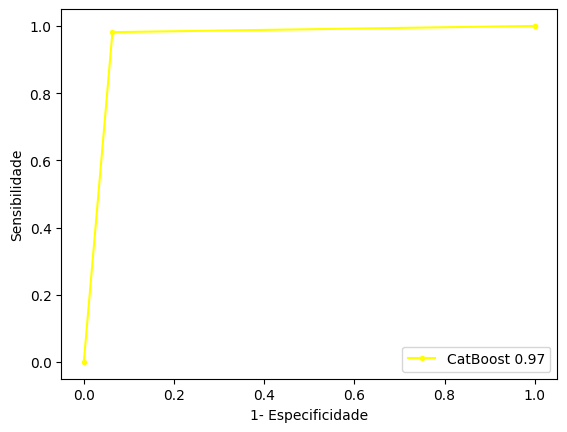

In [140]:
cat_fp, cat_vp, lim4 = roc_curve(y_teste, cat_predict)
cat_curva_roc = roc_auc_score(y_teste,cat_predict)

plt.plot(cat_fp, cat_vp, marker=".", label="CatBoost "+str(round(gbm_curva_roc, 2)), color="yellow")

plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')

plt.legend()

plt.show()

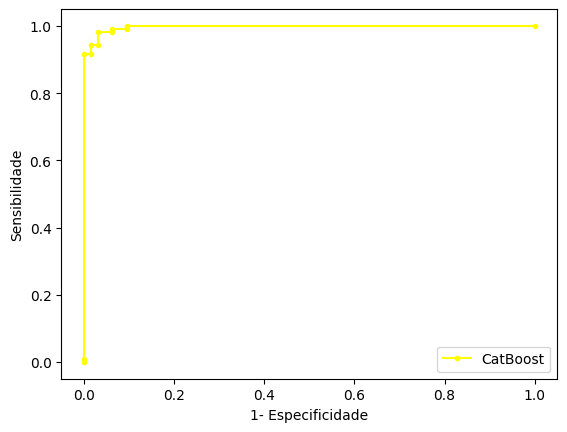

In [141]:
cat_probs = cat_predict_prob[:,1]

cat_fp, cat_vp, lim4 = roc_curve(y_teste, cat_probs)

plt.plot(cat_fp, cat_vp, marker=".", label="CatBoost", color="yellow")

plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')

plt.legend()

plt.show()

## Resultado

In [142]:
acuracia = accuracy_score(y_teste,cat_predict)
precisao = precision_score(y_teste,cat_predict)
recall = recall_score(y_teste,cat_predict)
f1Score = f1_score(y_teste,cat_predict)
cat_curva_roc = roc_auc_score(y_teste,cat_predict)
kappa = cohen_kappa_score(y_teste,cat_predict)

print('------ CatBoost ---------\n')
print(f'Acurácia: {acuracia}')
print(f'Precisão: {precisao}')
print(f'Recall ou Sensibilidade: {recall}')
print(f'F1-Score: {f1Score}')
print(f'Kappa: {kappa}')
print(f'Curva ROC: {cat_curva_roc}')

------ CatBoost ---------

Acurácia: 0.9649122807017544
Precisão: 0.9636363636363636
Recall ou Sensibilidade: 0.9814814814814815
F1-Score: 0.9724770642201834
Kappa: 0.9241011984021305
Curva ROC: 0.958994708994709


# SVC

In [143]:
from sklearn.svm import SVC

In [144]:
svc = SVC(random_state=random_state, probability=True)

model = svc.fit(x_treino, y_treino)

svc_predict = model.predict(x_teste)

svc_predict_prob = svc.predict_proba(x_teste)

## Gráficos

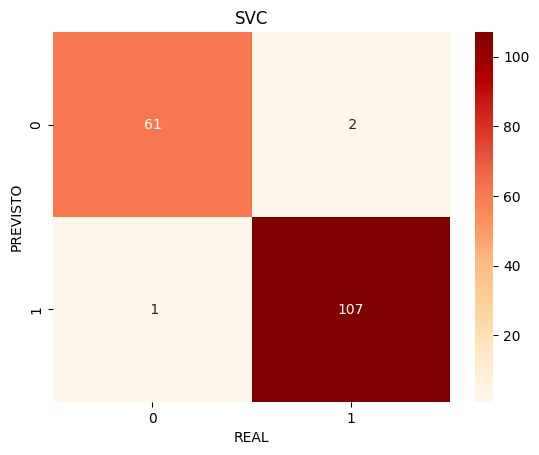

In [145]:
sns.heatmap(confusion_matrix(y_teste, svc_predict), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('SVC')
plt.ylabel('PREVISTO')
plt.xlabel('REAL')
plt.show()

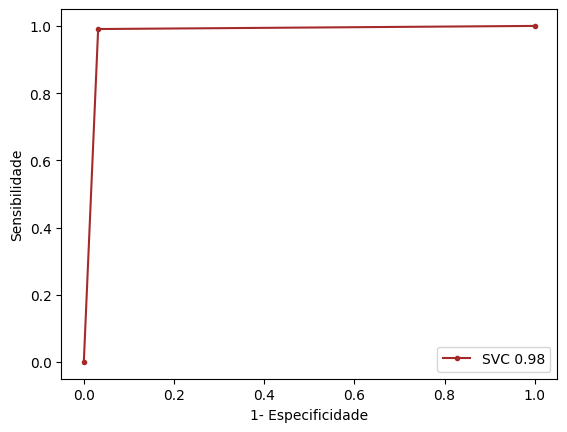

In [146]:
svc_fp, svc_vp, lim5 = roc_curve(y_teste, svc_predict)
svc_curva_roc = roc_auc_score(y_teste,svc_predict)

plt.plot(svc_fp, svc_vp, marker=".", label="SVC "+str(round(svc_curva_roc, 2)), color="brown")

plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')

plt.legend()

plt.show()

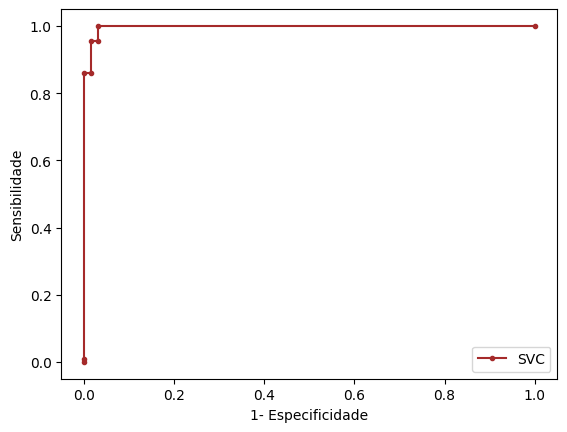

In [147]:
svc_probs = svc_predict_prob[:,1]

svc_fp, svc_vp, lim5 = roc_curve(y_teste, svc_probs)

plt.plot(svc_fp, svc_vp, marker=".", label="SVC", color="brown")

plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')

plt.legend()

plt.show()

## Resultado

In [148]:
acuracia = accuracy_score(y_teste,svc_predict)
precisao = precision_score(y_teste,svc_predict)
recall = recall_score(y_teste,svc_predict)
f1Score = f1_score(y_teste,svc_predict)
svc_curva_roc = roc_auc_score(y_teste,svc_predict)
kappa = cohen_kappa_score(y_teste,svc_predict)

print('------ CatBoost ---------\n')
print(f'Acurácia: {acuracia}')
print(f'Precisão: {precisao}')
print(f'Recall ou Sensibilidade: {recall}')
print(f'F1-Score: {f1Score}')
print(f'Kappa: {kappa}')
print(f'Curva ROC: {svc_curva_roc}')

------ CatBoost ---------

Acurácia: 0.9824561403508771
Precisão: 0.981651376146789
Recall ou Sensibilidade: 0.9907407407407407
F1-Score: 0.9861751152073732
Kappa: 0.9621765096217652
Curva ROC: 0.9794973544973544


# Resultado

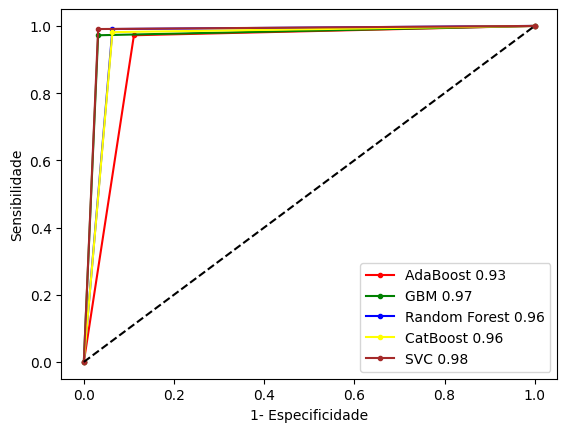

In [149]:
ada_fp, ada_vp, lim1 = roc_curve(y_teste, ada_predict)
gbm_fp, gbm_vp, lim2 = roc_curve(y_teste, gbm_predict)
rf_fp, rf_vp, lim3 = roc_curve(y_teste, rf_predict)
cat_fp, cat_vp, lim4 = roc_curve(y_teste, cat_predict)
svc_fp, svc_vp, lim5 = roc_curve(y_teste, svc_predict)

plt.plot(ada_fp, ada_vp, marker=".", label="AdaBoost "+str(round(ada_curva_roc, 2)), color="red")
plt.plot(gbm_fp, gbm_vp, marker=".", label="GBM "+str(round(gbm_curva_roc, 2)), color="green")
plt.plot(rf_fp, rf_vp, marker=".", label="Random Forest "+str(round(rf_curva_roc, 2)), color="blue")
plt.plot(cat_fp, cat_vp, marker=".", label="CatBoost "+str(round(cat_curva_roc, 2)), color="yellow")
plt.plot(svc_fp, svc_vp, marker=".", label="SVC "+str(round(svc_curva_roc, 2)), color="brown")
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')

plt.legend()

plt.show()

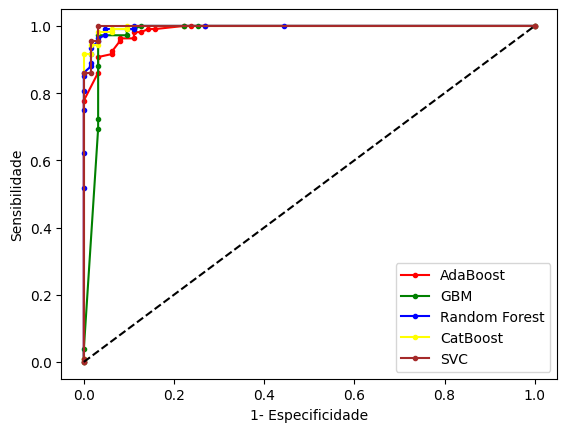

In [150]:
ada_probs = ada_predict_prob[:,1]
gbm_probs = gbm_predict_prob[:,1]
rf_probs = rf_predict_prob[:,1]
cat_probs = cat_predict_prob[:,1]
svc_probs = svc_predict_prob[:,1]

ada_fp, ada_vp, lim1 = roc_curve(y_teste, ada_probs)
gbm_fp, gbm_vp, lim2 = roc_curve(y_teste, gbm_probs)
rf_fp, rf_vp, lim3 = roc_curve(y_teste, rf_probs)
cat_fp, cat_vp, lim4 = roc_curve(y_teste, cat_probs)
svc_fp, svc_vp, lim5 = roc_curve(y_teste, svc_probs)

plt.plot(ada_fp, ada_vp, marker=".", label="AdaBoost", color="red")
plt.plot(gbm_fp, gbm_vp, marker=".", label="GBM", color="green")
plt.plot(rf_fp, rf_vp, marker=".", label="Random Forest", color="blue")
plt.plot(cat_fp, cat_vp, marker=".", label="CatBoost", color="yellow")
plt.plot(svc_fp, svc_vp, marker=".", label="SVC", color="brown")
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')

plt.legend()

plt.show()
